In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import astropy.units as u
import numpy as np
from astroduet.filters import load_qe, load_reflectivity, load_redfilter, load_transmission, apply_trans
from astroduet.background import airglow_lines
from astroduet.zodi import load_airglow, load_zodi
from astroduet.config import Telescope

from astroduet.bbmag import bb_abmag_fluence

from matplotlib import pyplot as plt
%matplotlib inline
font = {'family' : 'sans-serif',""
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

# Make duet Telescope instance
duet = Telescope()
zodi = load_zodi(scale=77, airglow=False)
no_airglow = zodi['flux'].copy()
airglow_lines = airglow_lines(zodi['wavelength'])
zodi['flux'] += airglow_lines
pixel_area = duet.pixel **2

duet.band2

{'eff_wave': <Quantity 280.34471808 nm>,
 'eff_width': <Quantity 41.64586798 nm>}

Optics reflectivity loader
Input file /Users/bwgref/science/local/git/duet-astro/astroduet/data/mirror_coatings_20190518.csv


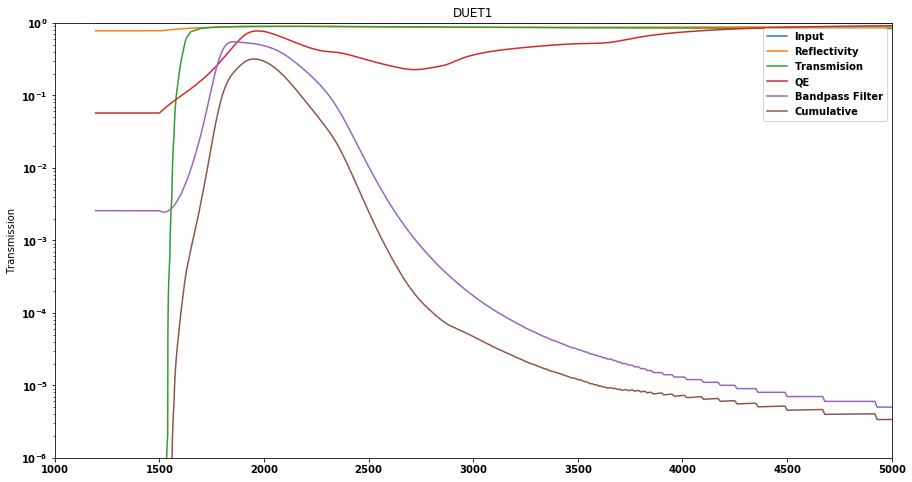

In [2]:
wave = zodi['wavelength']
flat_flux = np.zeros_like(zodi['flux']).value + 1
filter_type='B'
ref_wave, reflectivity = load_reflectivity(duet.reflectivity_file['name'], diag=True)

refl_trans = apply_trans(wave, flat_flux, ref_wave, reflectivity)


trans_wave, transmission = load_transmission(duet.transmission_file)
trans_fl = apply_trans(wave, flat_flux, trans_wave, transmission)

stacked = apply_trans(wave, refl_trans, trans_wave, transmission)


qe_wave, qe = load_qe(duet.qe_files['names'][0])
qe_eff = apply_trans(wave, flat_flux, qe_wave, qe)

stacked = apply_trans(wave, stacked, qe_wave, qe)


red_wave, red_trans = load_redfilter(duet.bandpass_files['names'][0], filter_type=filter_type)
red_eff = apply_trans(wave, flat_flux, red_wave, red_trans)
stacked = apply_trans(wave, stacked, red_wave, red_trans)



fig = plt.figure(figsize = (15, 8))
ax = fig.subplots()

ax.plot(wave, flat_flux, label='Input')
ax.plot(wave, refl_trans, label='Reflectivity')
ax.plot(wave, trans_fl, label='Transmision')
ax.plot(wave, qe_eff, label='QE')
ax.plot(wave, red_eff, label='Bandpass Filter')

ax.plot(wave, stacked, label='Cumulative')



ax.set_ylabel('Transmission')
ax.set_xlim([1000, 5000])
ax.set_ylim([1e-6, 1])


ax.legend(loc=1)
ax.set_title('DUET1')

ax.set_yscale('Log')

plt.show()



f = open('duet1_transmisson.txt', 'w')
for wv, ref, trans, qi, ri, ti in zip(wave.value, refl_trans, trans_fl, qe_eff, red_eff, stacked):
    f.write('{} {} {} {} {} {}\n'.format(wv, ref, trans, qi, ri, ti))

f.close()

Optics reflectivity loader
Input file /Users/bwgref/science/local/git/duet-astro/astroduet/data/mirror_coatings_20190518.csv


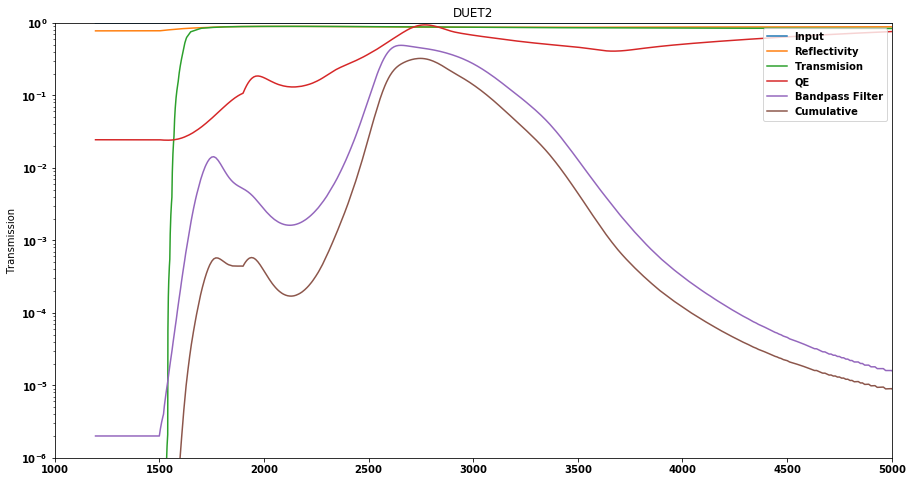

In [7]:
wave = zodi['wavelength']
flat_flux = np.zeros_like(zodi['flux']).value + 1

ref_wave, reflectivity = load_reflectivity(duet.reflectivity_file['name'], diag=True)

refl_trans = apply_trans(wave, flat_flux, ref_wave, reflectivity)


trans_wave, transmission = load_transmission(duet.transmission_file)
trans_fl = apply_trans(wave, flat_flux, trans_wave, transmission)

stacked = apply_trans(wave, refl_trans, trans_wave, transmission)


qe_wave, qe = load_qe(duet.qe_files['names'][1])
qe_eff = apply_trans(wave, flat_flux, qe_wave, qe)

stacked = apply_trans(wave, stacked, qe_wave, qe)


red_wave, red_trans = load_redfilter(duet.bandpass_files['names'][1], filter_type=filter_type)
red_eff = apply_trans(wave, flat_flux, red_wave, red_trans)
stacked = apply_trans(wave, stacked, red_wave, red_trans)



fig = plt.figure(figsize = (15, 8))
ax = fig.subplots()

ax.plot(wave, flat_flux, label='Input')
ax.plot(wave, refl_trans, label='Reflectivity')
ax.plot(wave, trans_fl, label='Transmision')
ax.plot(wave, qe_eff, label='QE')
ax.plot(wave, red_eff, label='Bandpass Filter')

ax.plot(wave, stacked, label='Cumulative')



ax.set_ylabel('Transmission')
ax.set_xlim([1000, 5000])
ax.set_ylim([1e-6, 1])


ax.legend(loc=1)
ax.set_title('DUET2')

ax.set_yscale('Log')

plt.show()


f = open('duet2_transmisson.txt', 'w')
for wv, ref, trans, qi, ri, ti in zip(wave.value, refl_trans, trans_fl, qe_eff, red_eff, stacked):
    f.write('{} {} {} {} {} {}\n'.format(wv, ref, trans, qi, ri, ti))

f.close()

Optics reflectivity loader
Input file /Users/bwgref/science/local/git/duet-astro/astroduet/data/mirror_coatings_20190518.csv
Optics reflectivity loader
Input file /Users/bwgref/science/local/git/duet-astro/astroduet/data/mirror_coatings_20190518.csv
['/Users/bwgref/science/local/git/duet-astro/astroduet/data/duet1_qe_20190518_v2.csv', '/Users/bwgref/science/local/git/duet-astro/astroduet/data/duet2_qe_20190518_v3.csv']
3.426888272332169e-05
30300.546103961038 ph / (Angstrom cm2 s sr) 884200000.0 ph / (Angstrom cm2 s sr)


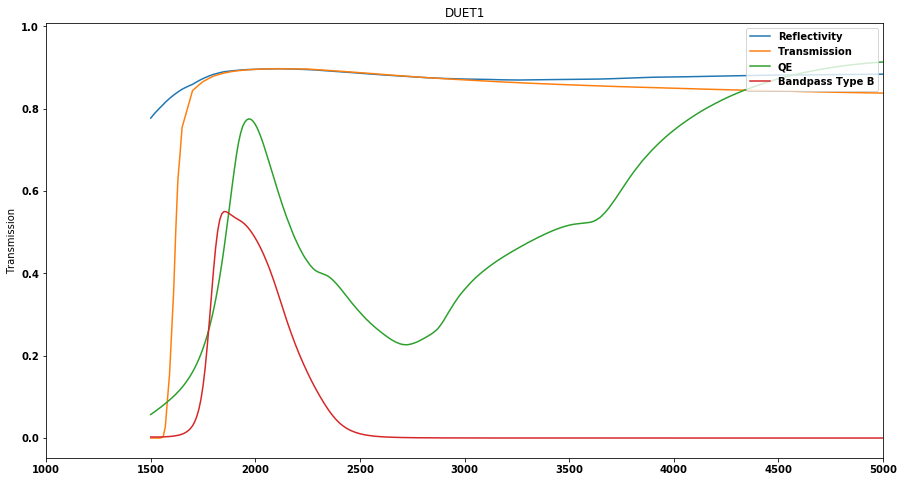

In [4]:
# Band 1



band_flux = duet.apply_filters(zodi['wavelength'], zodi['flux'], band=1, diag=True)
ref_wave, reflectivity = load_reflectivity(duet.reflectivity_file['name'], diag=True)
trans_wave, transmission = load_transmission(duet.transmission_file)

low_wave = duet.bandpass1[0]
high_wave = duet.bandpass1[1]

print(duet.qe_files['names'])
qe_wave, qe = load_qe(duet.qe_files['names'][0])
red_wave, red_trans = load_redfilter(duet.bandpass_files['names'][0], filter_type=filter_type)

fig = plt.figure(figsize = (15, 8))
ax = fig.subplots()

ax.plot(ref_wave.to(u.AA), reflectivity, label='Reflectivity')
ax.plot(trans_wave.to(u.AA), transmission, label='Transmission')
ax.plot(qe_wave.to(u.AA), qe, label="QE")
ax.plot(red_wave.to(u.AA), red_trans, label='Bandpass Type {}'.format(filter_type))

    

ax.set_ylabel('Transmission')
ax.set_xlim([1000, 5000])
ax.legend(loc=1)
ax.set_title('DUET1')
o2_total = duet.apply_filters(zodi['wavelength'], airglow_lines, filter_type = 'B')
print(o2_total.sum() / airglow_lines.sum())

print(o2_total.sum(), airglow_lines.sum())


0.00011856047372597228


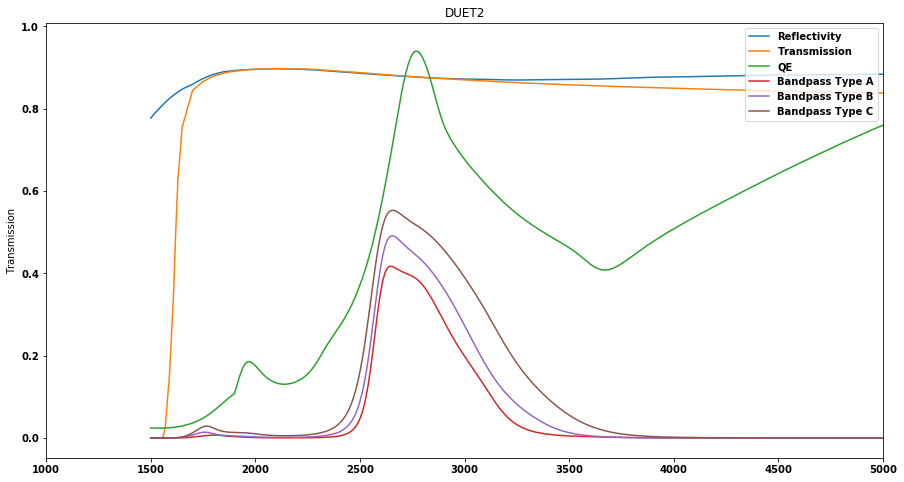

In [5]:
# Band 2
low_wave = duet.bandpass2[0]
high_wave = duet.bandpass2[1]

qe_wave, qe = load_qe(infile=duet.qe_files['names'][1], diag=True)

fig = plt.figure(figsize = (15, 8))
ax = fig.subplots()

ax.plot(ref_wave.to(u.AA), reflectivity, label='Reflectivity')
ax.plot(trans_wave.to(u.AA), transmission, label='Transmission')
ax.plot(qe_wave.to(u.AA), qe, label="QE")



for filter_type in ['A', 'B', 'C']:
    red_wave, red_trans = load_redfilter(duet.bandpass_files['names'][1], filter_type=filter_type)
    ax.plot(red_wave.to(u.AA), red_trans, label='Bandpass Type {}'.format(filter_type))
    
    o2_trans = apply_trans(zodi['wavelength'], airglow_lines, red_wave, red_trans)
ax.set_ylabel('Transmission')
ax.set_xlim([1000, 5000])
ax.legend(loc=1)
ax.set_title('DUET2')




o2_total = duet.apply_filters(zodi['wavelength'], airglow_lines, band=2, filter_type='B')
print(o2_total.sum() / airglow_lines.sum())


---- Band 1 ----
---- Zodi + Lines ----
Background Rate: 0.01753365098332382 ph / s
Background Counts (x neff): 42.574219761082155 ph
Background shot noise: 6.524892317968332 ph(1/2)
Read nouse: 4
Dark Counts: 3.3994008277114696 ph
O2 Rate: 0.014448738075404189 ph / s
O2 Supression: 0.0038355121650583595
---- Band 2 ----
---- Zodi + Lines ----
Background Rate: 0.17922799624269029 ph / s
Background Counts (x neff): 435.1912848403354 ph
Background shot noise: 20.86123881365475 ph(1/2)
Read nouse: 4
Dark Counts: 3.3994008277114696 ph
O2 Rate: 0.04998847627432563 ph / s
O2 Supression: 0.013269768464367683


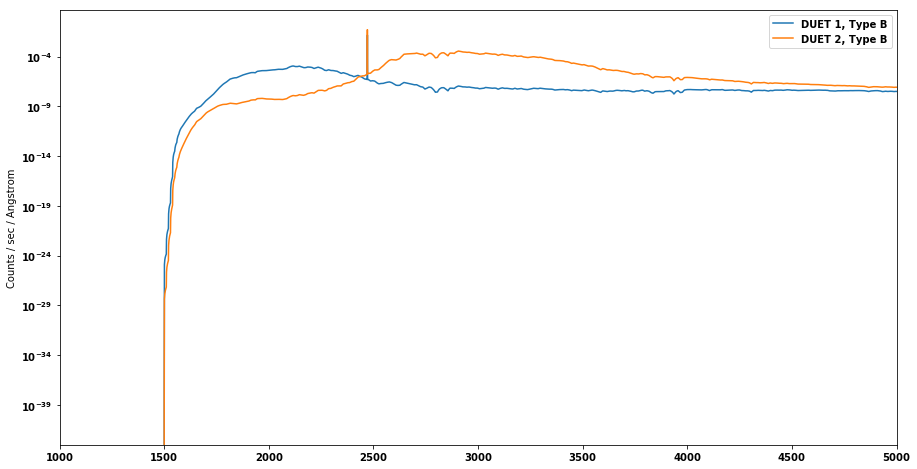

In [6]:
from astroduet.background import airglow_lines



fig = plt.figure(figsize = (15, 8))
ax = fig.subplots()


de = zodi['wavelength'][1] - zodi['wavelength'][0]

exposure = 300*u.s

zodi = load_zodi(scale=77, airglow=False)
no_airglow = zodi['flux'].copy()
airglow_lines = airglow_lines(zodi['wavelength'])
zodi['flux'] += airglow_lines



for band in [1, 2]:
    print('---- Band {} ----'.format(band))
    for filter_type in ['B']:
        band_flux = duet.apply_filters(zodi['wavelength'], zodi['flux'], band=band, filter_type=filter_type)
        
        ph_flux = (de*band_flux).to(u.ph / ((u.cm**2 * u.arcsec**2 * u.s)))
        fluence = ph_flux * pixel_area
        rate = duet.fluence_to_rate(fluence)
        print('---- Zodi + Lines ----')
        print('Background Rate: {}'.format(rate.sum()))
        bgd_cts = rate.sum()*exposure*duet.neff
        print('Background Counts (x neff): {}'.format(bgd_cts))
        print('Background shot noise: {}'.format(np.sqrt( bgd_cts)))
        print('Read nouse: {}'.format(duet.read_noise))
        print('Dark Counts: {}'.format(duet.dark_current*exposure*duet.neff))
        
        
        ax.plot(zodi['wavelength'], rate, label = 'DUET {}, Type {}'.format(band, filter_type))
        
        band_flux2 = duet.apply_filters(zodi['wavelength'], no_airglow, band=band, filter_type=filter_type)
    
        
        zodi_ph = (de*band_flux).to(u.ph / ((u.cm**2 * u.arcsec**2 * u.s)))
#         o2_rate = duet.fluence_to_rate(ph_flux.sum()*pixel_area)
        
        airglow_obs = duet.apply_filters(zodi['wavelength'], airglow_lines, filter_type = filter_type, band=band)
        inrange = np.where(zodi['wavelength'] > 2000*u.AA)
        o2_supression = airglow_obs[inrange].sum() / airglow_lines[inrange].sum()
        airglow_ph = (airglow_obs * de).to(u.ph / ((u.cm**2 * u.arcsec**2 * u.s)))
        airglow_fluence = airglow_ph * pixel_area
        airglow_rate = duet.fluence_to_rate(airglow_fluence)


        
        
        print('O2 Rate: {}'.format(airglow_rate[inrange].sum()))
        print('O2 Supression: {}'.format(o2_supression))
        
        
        
    
ax.set_xlim([1000, 5000])
#ax.set_ylim([1e-2, 1e7])
ax.set_yscale('Log')
ax.set_ylabel('Counts / sec / Angstrom')
ax.legend()
plt.show()